# Fundamentals of Machine Learning - Exercise 2
* The aim of the exercise is to learn basic techniques for visualization creation and interpretation using Matplotlib and Seaborn libraries.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_02.png?raw=true)

# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [1]:
pip install --upgrade seaborn

In [2]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv')


## Price is the most interisting attribute in our dataset, let's take a look on its distribution
- SalePrice

## Vizualize house prices in form of histogram
- What does it tell us about the prices?

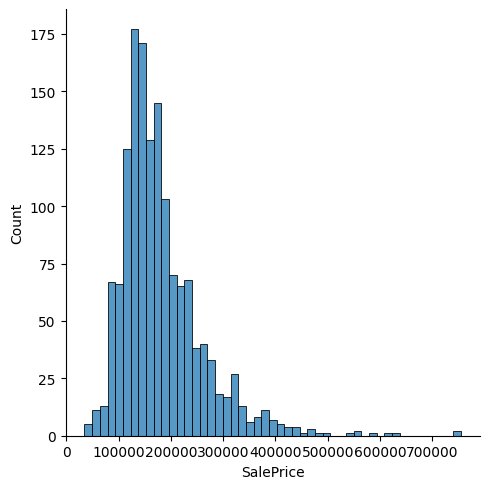

In [4]:
sns.displot(df.SalePrice)

### Modify bins
- Perhaps we want to visualize the histogram with more dense or coarse bins
- *bins* attribute

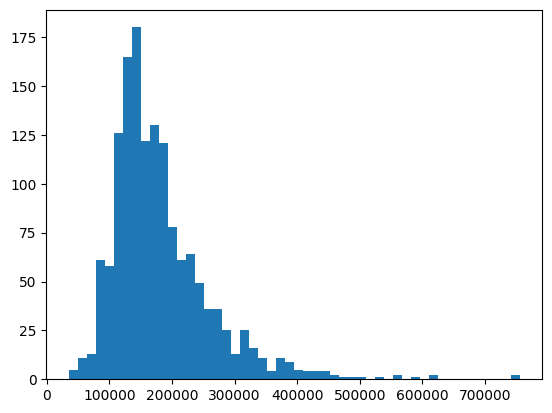

In [5]:
plt.hist(df.SalePrice, bins=50)
plt.show()

### Use quartiles (Q1, Q3) for highlighting most common price range in histogram

* Check functions *describe* and *quantile* over price column

In [6]:
df.SalePrice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [7]:
df.SalePrice.quantile(.25), df.SalePrice.quantile(.75)

(129975.0, 214000.0)

## 🔎 What can we say about prices based on the quantiles?
### Use function *axvline* from Matplotlib to draw vertical lines at the quartile positions

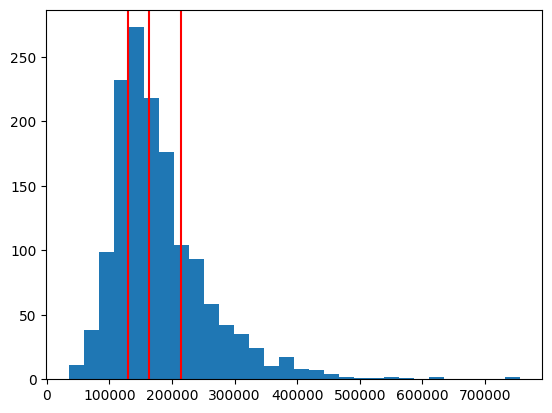

In [8]:
plt.hist(df.SalePrice, bins=30)
plt.axvline(df.SalePrice.quantile(.25), color='red')
plt.axvline(df.SalePrice.quantile(.5), color='red')
plt.axvline(df.SalePrice.quantile(.75), color='red')
plt.show()

## 📊 Let's add more complexity to histogram vizualizations.
### Does price change for different values of GaragaFinish attribute?

### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished
- Unf	Unfinished
- NA	No Garage

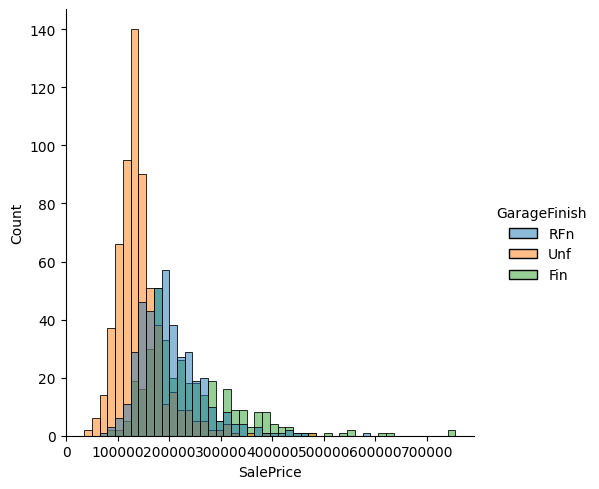

In [9]:
sns.displot(data=df, x='SalePrice', hue='GarageFinish')

### 💡 We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

### Fill nan values with 'NoGarage' string

In [10]:
df.GarageFinish = df.GarageFinish.fillna('NoGarage')

In [11]:
df['GarageFinish'] =  df.GarageFinish.fillna('NoGarage')

### Take a look at the histogram again

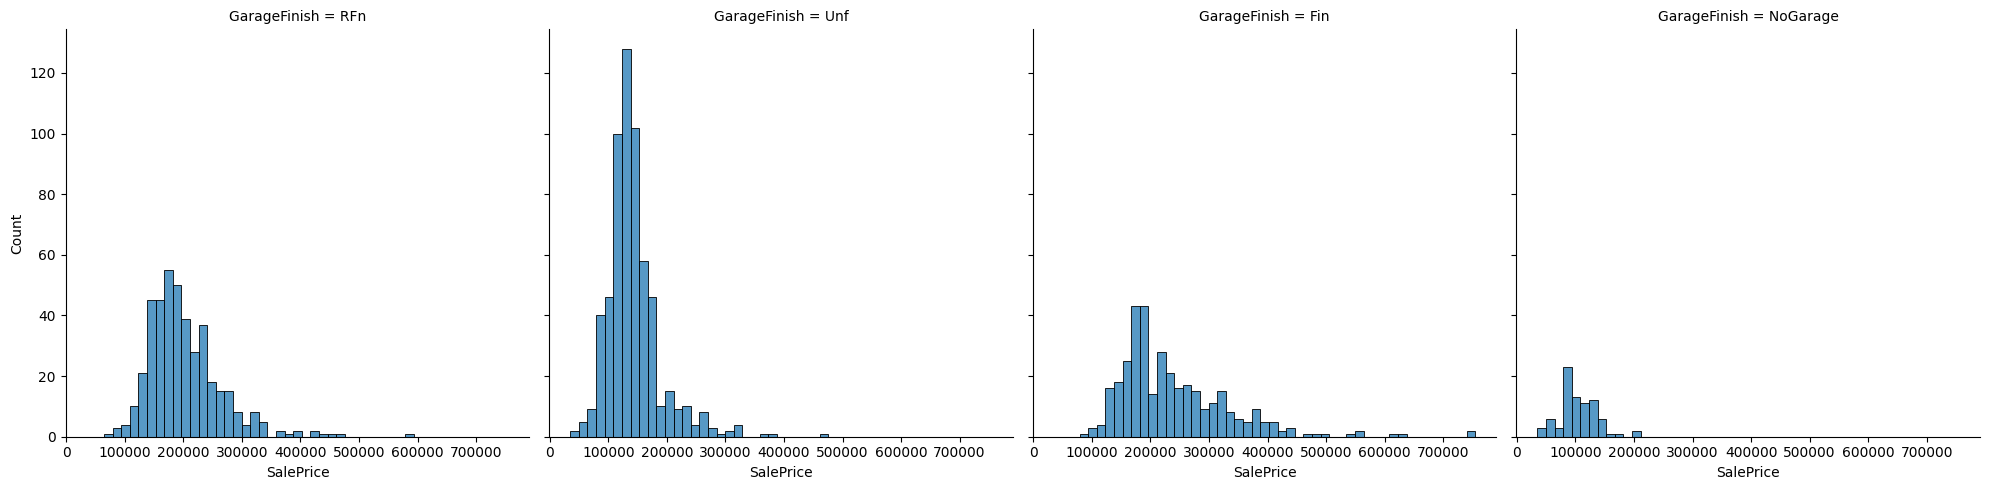

In [12]:
sns.displot(data=df, x='SalePrice', col='GarageFinish')

## 💡 Sometimes the histograms distinguished by colors are not easily redeable
- We can use *col* attribute to automatically plot every histogram on its own canvas

In [13]:
df.groupby('GarageFinish').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
GarageFinish,,,,,,,,
Fin,352.0,240052.690341,96960.593232,82500.0,176000.0,215000.0,283847.25,755000.0
NoGarage,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.00,200500.0
RFn,422.0,202068.869668,63536.222518,68400.0,158000.0,190000.0,232000.00,582933.0
Unf,605.0,142156.423140,46498.528211,35311.0,116000.0,135000.0,157000.00,475000.0


# 📊 Another very useful tecnique for the numerical features distributions are boxplots
- 🔎 Did you see any of these before?

- 🔎 How should we read boxplots?
    - **Quartiles**
    - **Median**
    - Box size
    - **Outliers and IQR**
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

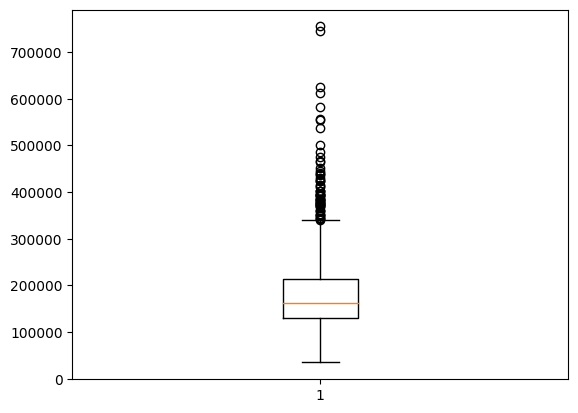

In [14]:
plt.boxplot(df.SalePrice)
plt.show()

## Let's take a look at the *SalePrice* for different *BldgType* values
- 🔎 What can we say about the prices?

<Axes: xlabel='BldgType', ylabel='SalePrice'>

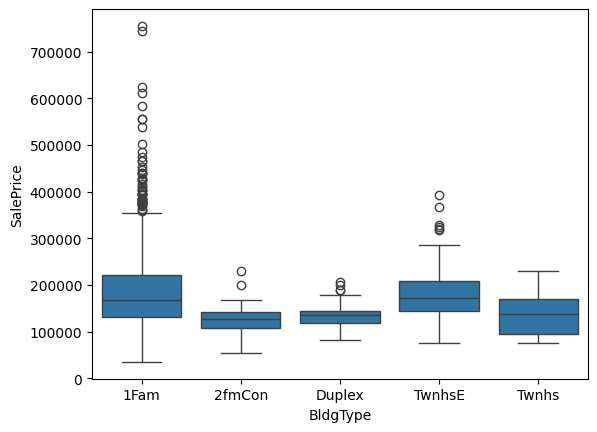

In [15]:
sns.boxplot(data=df, x='BldgType', y='SalePrice')

## We can do the same for *GrLivArea*

<Axes: xlabel='BldgType', ylabel='GrLivArea'>

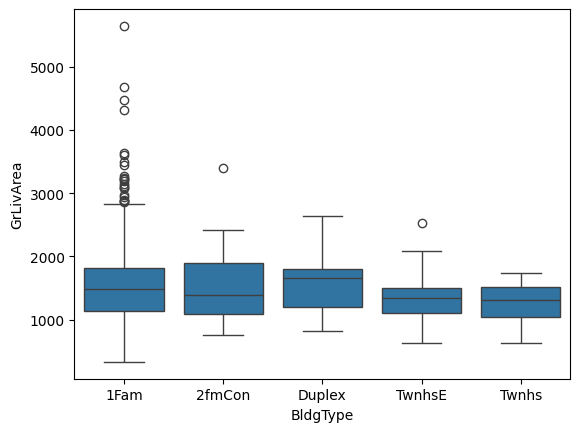

In [16]:
sns.boxplot(data=df, x='BldgType', y='GrLivArea')

## Let's take a look at the *GrLivArea* for different *BldgType* values
- 🔎 What can we say about the GrLivArea?

<Axes: xlabel='BldgType', ylabel='GrLivArea'>

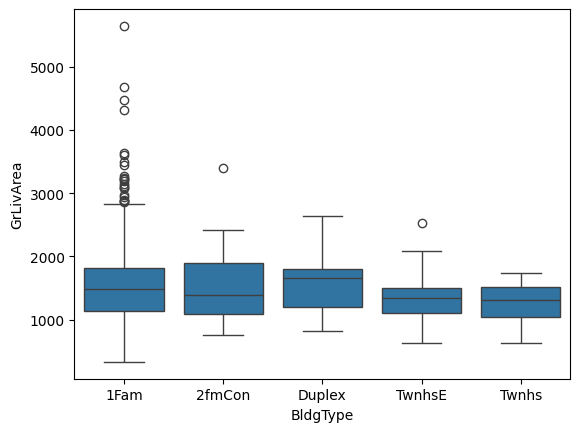

In [17]:
sns.boxplot(data=df, x='BldgType', y='GrLivArea')

# 📊 Scatter plots are commonly used for visualizing two numerical variables

### We can use standard *scatterplot* with *BldgType* as a *hue* so we can better grasp the relationship between *GrLivArea* and *SalePrice*
* Try to set *alpha* parameter for opacity settings

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

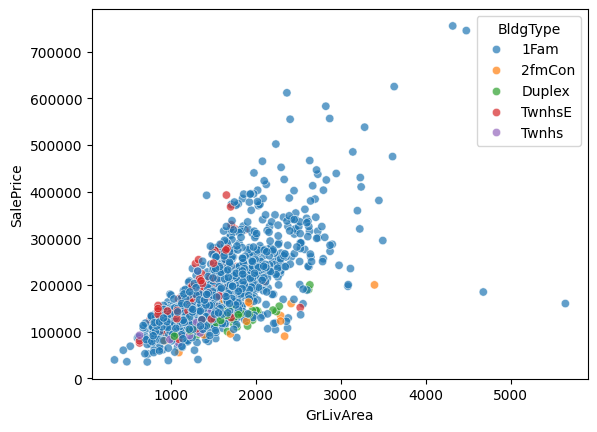

In [18]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='BldgType', alpha=.7)

### We can see there are some outliers in the data, let's zoom only to area without them, how can we filter the data?

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

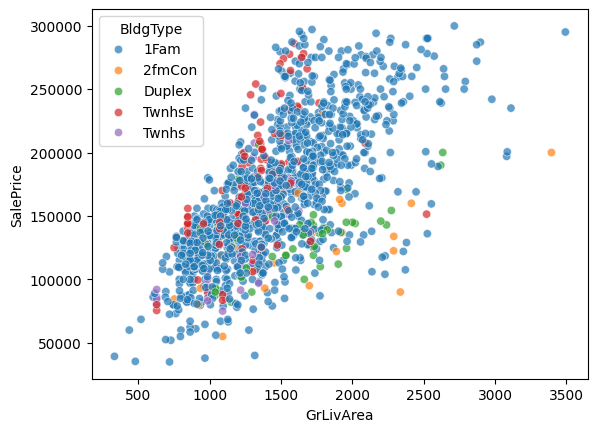

In [19]:
sns.scatterplot(data=df[(df['SalePrice'] < 300_000) & (df['GrLivArea'] < 3500)], x='GrLivArea', y='SalePrice', hue='BldgType', alpha=0.7)

# We have an information about a month and a year for the sold houses.
## 🔎 Can you vizualize what was the average price of the house by quarters?

* We need to create a new column **YearQuarterSold** with merged Year and Quarter information in this pattern: '2010-1','2010-2' and so on first
    * We can map the values using the *apply* function or use string concatenation directly
* 💡 If you need to change data type of the columns, you can use *astype*

In [20]:
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['YearQuarterSold'] = df['YrSold'] + '-Q' + (df['MoSold'].astype(int) // 3 + 1).astype(str)

df.YearQuarterSold

,YearQuarterSold
0,2008-Q1
1,2007-Q2
2,2008-Q4
3,2006-Q1
4,2008-Q5
...,...
1455,2007-Q3
1456,2010-Q1
1457,2010-Q2
1458,2010-Q2


### Compute the average price for the *YearQuarterSold* attribute

In [21]:
avg_price = df.groupby('YearQuarterSold').SalePrice.mean()
avg_price

,SalePrice
YearQuarterSold,
2006-Q1,197884.210526
2006-Q2,170780.844444
2006-Q3,181581.594203
2006-Q4,198284.618182
2006-Q5,185545.000000
2007-Q1,180593.523810
2007-Q2,171835.842697
2007-Q3,186178.033333
2007-Q4,202799.156863


## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

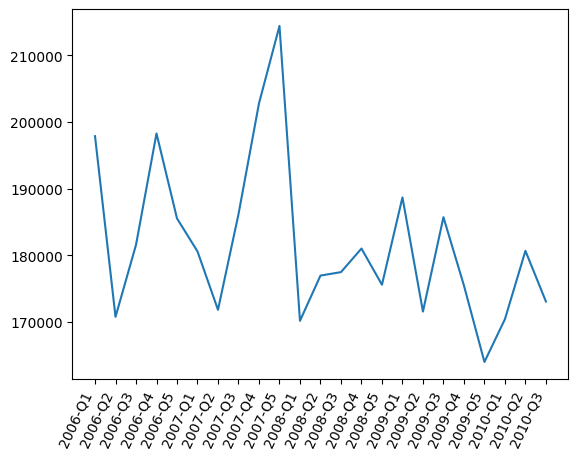

In [22]:
plt.plot(avg_price.index, avg_price.values)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [23]:
df.groupby('YearQuarterSold').SalePrice.describe().reset_index()

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-Q1,19.0,197884.210526,67980.170827,105000.0,154750.0,181000.0,228500.0,423000.0
1,2006-Q2,90.0,170780.844444,67801.457961,52500.0,130000.0,159000.0,199250.0,437154.0
2,2006-Q3,138.0,181581.594203,83429.980407,79900.0,129900.0,159975.0,216250.0,625000.0
3,2006-Q4,55.0,198284.618182,90786.544432,35311.0,136200.0,169990.0,240789.0,465000.0
4,2006-Q5,12.0,185545.000000,69292.448559,98600.0,132000.0,175000.0,236000.0,290000.0
5,2007-Q1,21.0,180593.523810,143535.386680,39300.0,122000.0,143000.0,194201.0,755000.0
6,2007-Q2,89.0,171835.842697,79713.712334,79000.0,125000.0,146800.0,194000.0,466500.0
7,2007-Q3,150.0,186178.033333,81608.305302,64500.0,134000.0,166750.0,219500.0,745000.0
8,2007-Q4,51.0,202799.156863,76159.574290,67000.0,141500.0,192000.0,243950.0,392000.0
9,2007-Q5,18.0,214414.500000,81118.090800,84500.0,144750.0,231000.0,268975.0,340000.0


![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_01.png?raw=true)

In [24]:
df_agg = df.groupby('YearQuarterSold').SalePrice.describe().reset_index()
df_melt = pd.melt(df_agg, id_vars=['YearQuarterSold'], value_vars=['min', 'mean', '50%', 'max'])
df_melt

,YearQuarterSold,variable,value
0,2006-Q1,min,105000.0
1,2006-Q2,min,52500.0
2,2006-Q3,min,79900.0
3,2006-Q4,min,35311.0
4,2006-Q5,min,98600.0
...,...,...,...
87,2009-Q4,max,402861.0
88,2009-Q5,max,263435.0
89,2010-Q1,max,319900.0
90,2010-Q2,max,611657.0


## What can we say about the minimum and maximum values?
- 💡Take a look at std. deviation

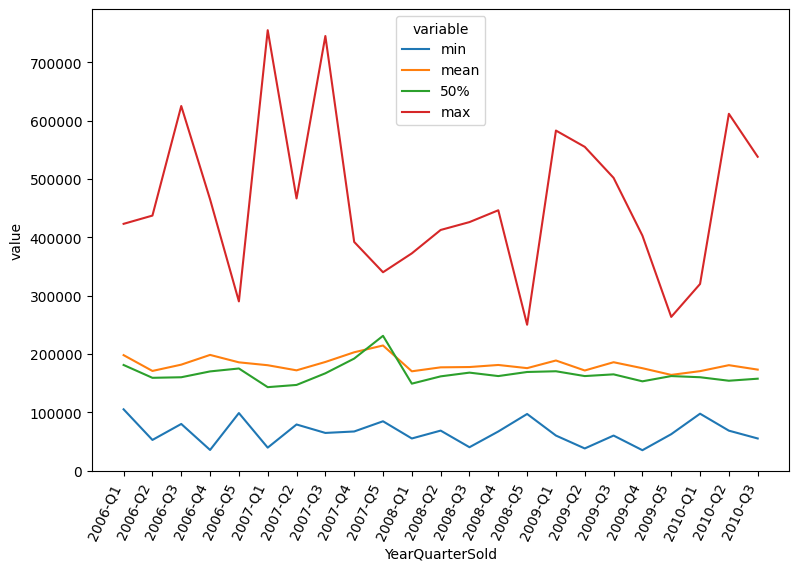

In [25]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_melt, x='YearQuarterSold', y='value', hue='variable')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# We can take a look at number of sold houses for the defined time periods as well
## 📊 We will use standard bar plot
- 🔎 In which quarter were the most houses sold?
- 💡 Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

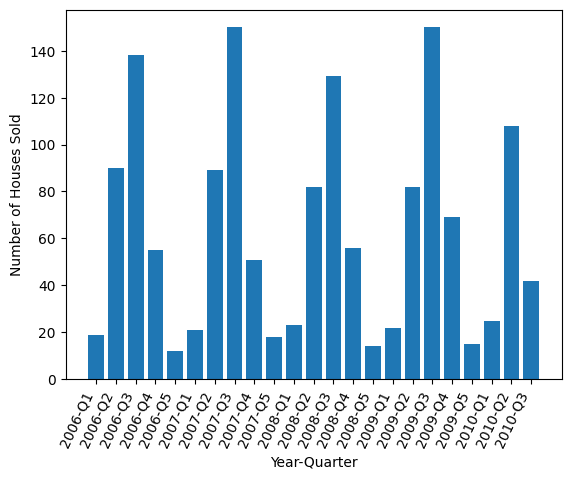

In [26]:
house_counts = df.groupby('YearQuarterSold').size()
plt.bar(house_counts.index, house_counts.values)
plt.xticks(rotation=65, horizontalalignment='right')
plt.ylabel('Number of Houses Sold')
plt.xlabel('Year-Quarter')
plt.show()

# Tasks (2p)
## ✅ Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- 💡 If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*) 💡

## ✅ Task 2 - Describe what you see in the data (1p)
- Try to vizualize the relationship between *SalePrice* and *OverallQual*
    - 💡You can use BoxPlots, Scatter plots, etc., the choice of a right plot type is up to you 🙂
- Do the same for *SalePrice* and *OverallCond*; i.e. vizualize and describe insight-
- **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
    - ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

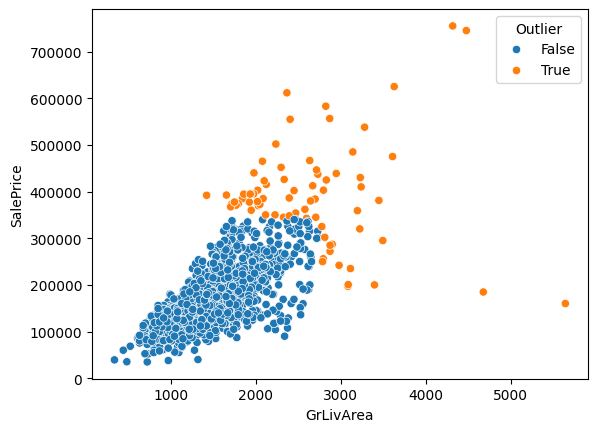

In [27]:
Q1_SalePrice, Q3_SalePrice = df.SalePrice.quantile([0.25, 0.75])
IQR_SalePrice = Q3_SalePrice - Q1_SalePrice
lower_bound_SalePrice = Q1_SalePrice - 1.5 * IQR_SalePrice
upper_bound_SalePrice = Q3_SalePrice + 1.5 * IQR_SalePrice

Q1_GrLivArea, Q3_GrLivArea = df.GrLivArea.quantile([0.25, 0.75])
IQR_GrLivArea = Q3_GrLivArea - Q1_GrLivArea
lower_bound_GrLivArea = Q1_GrLivArea - 1.5 * IQR_GrLivArea
upper_bound_GrLivArea = Q3_GrLivArea + 1.5 * IQR_GrLivArea

df['Outlier'] = ((df.SalePrice < lower_bound_SalePrice) | (df.SalePrice > upper_bound_SalePrice)) | \
                ((df.GrLivArea < lower_bound_GrLivArea) | (df.GrLivArea > upper_bound_GrLivArea))

sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='Outlier')
plt.show()

### Vztah mezi SalePrice a OverallQual
Z grafu můžeme vidět, že s rostoucí hodnotou `OverallQual` (kvalita) roste také cena nemovitosti (`SalePrice`). Nejvyšší kvality mají výrazně vyšší cenu než nemovitosti s nižší kvalitou.


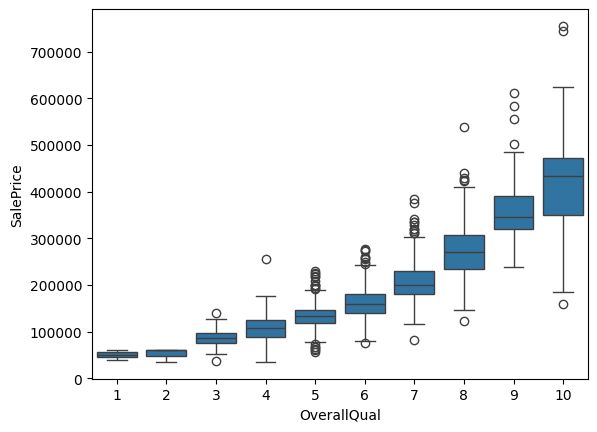

In [28]:
sns.boxplot(data=df, x='OverallQual', y='SalePrice')
plt.show()

### Vztah mezi SalePrice a OverallCond
Vztah mezi `SalePrice` a `OverallCond` (celkový stav) není tak jednoznačný jako u kvality. I když existují některé rozdíly ceny zůstávají relativně konzistentní, což může naznačovat, že stav nemovitosti nemá tak silný vliv na její tržní hodnotu jako kvalita.


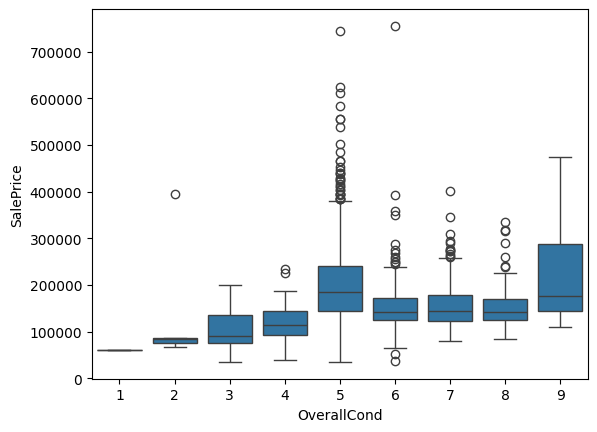

In [29]:
sns.boxplot(data=df, x='OverallCond', y='SalePrice')
plt.show()